<a href="https://colab.research.google.com/github/padibi4/cap-comp215/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import networkx as nx
import random

# Define the items for each category
shoes_items = {'Male Adult': ['Nike', 'Adidas', 'Puma', 'Browns'],
               'Female Adult': ['Nike', 'Adidas', 'Puma', 'Browns'],
               'Male Kid': ['FootLocker', 'Sketchers'],
               'Female Kid': ['FootLocker', 'Sketchers']}
clothing_items = {'Male Adult': ['Lululemon Men', 'OVO', 'Zara Men'],
                  'Female Adult': ['Lululemon Women', 'Aritzia', 'Zara Women'],
                  'Male Kid': ['OVO', 'Zara Kids'],
                  'Female Kid': ['Zara Kids', 'Aritzia']}
fragrances_items = {'Male Adult': ['Chanel', 'Dior', 'YSL', 'Gucci'],
                    'Female Adult': ['Sephora', 'Chanel', 'Dior', 'YSL', 'Gucci'],
                    'Male Kid': ['Bath and Body Works'],
                    'Female Kid': ['Bath and Body Works']}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for factors
G.add_nodes_from(['Gender', 'Age', 'Category'])
G.add_nodes_from(['Male', 'Female'])
G.add_nodes_from(['Adult', 'Kid'])

# Add nodes for items and edges connecting items to corresponding factors
for gender_age, items in shoes_items.items():
    for item in items:
        G.add_node(item, Gender=gender_age.split()[0], Age=gender_age.split()[1], Category='Shoes')
        G.add_edge('Gender', item)
        G.add_edge('Age', item)
        G.add_edge('Category', item)

for gender_age, items in clothing_items.items():
    for item in items:
        G.add_node(item, Gender=gender_age.split()[0], Age=gender_age.split()[1], Category='Clothing')
        G.add_edge('Gender', item)
        G.add_edge('Age', item)
        G.add_edge('Category', item)

for gender_age, items in fragrances_items.items():
    for item in items:
        G.add_node(item, Gender=gender_age.split()[0], Age=gender_age.split()[1], Category='Fragrances')
        G.add_edge('Gender', item)
        G.add_edge('Age', item)
        G.add_edge('Category', item)

# Function to select an item based on preferences
def select_item(gender, age, category):
    eligible_items = [item for item in G.nodes if G.nodes[item].get('Category') == category and G.nodes[item].get('Gender') == gender and G.nodes[item].get('Age') == age]
    if eligible_items:
        return random.choice(eligible_items)
    else:
        return "No matching items found for the given preferences."

# Function to generate random preferences
def generate_random_preferences(num_samples):
    preferences = []
    genders = ['Male', 'Female']
    ages = ['Adult', 'Kid']
    categories = ['Shoes', 'Clothing', 'Fragrances']
    for _ in range(num_samples):
        gender = random.choice(genders)
        age = random.choice(ages)
        category = random.choice(categories)
        preferences.append((gender, age, category))
    return preferences

# Example usage
num_samples = 5
random_preferences = generate_random_preferences(num_samples)
for i, (gender, age, category) in enumerate(random_preferences, 1):
    selected_item = select_item(gender, age, category)
    print(f"Sample {i}: Gender: {gender}, Age: {age}, Category: {category}, Selected Item: {selected_item}")


Sample 1: Gender: Male, Age: Kid, Category: Clothing, Selected Item: OVO
Sample 2: Gender: Female, Age: Adult, Category: Fragrances, Selected Item: YSL
Sample 3: Gender: Male, Age: Adult, Category: Clothing, Selected Item: Zara Men
Sample 4: Gender: Female, Age: Kid, Category: Fragrances, Selected Item: Bath and Body Works
Sample 5: Gender: Male, Age: Adult, Category: Shoes, Selected Item: No matching items found for the given preferences.


Sample 1: Gender: Male, Age: Adult, Category: Clothing, Selected Item: Lululemon Men
Sample 2: Gender: Female, Age: Adult, Category: Shoes, Selected Item: Nike
Sample 3: Gender: Male, Age: Adult, Category: Fragrances, Selected Item: No matching items found for the given preferences.
Sample 4: Gender: Female, Age: Kid, Category: Clothing, Selected Item: Zara Kids
Sample 5: Gender: Female, Age: Kid, Category: Clothing, Selected Item: Zara Kids


NetworkXError: Node 'Nike' has no position.

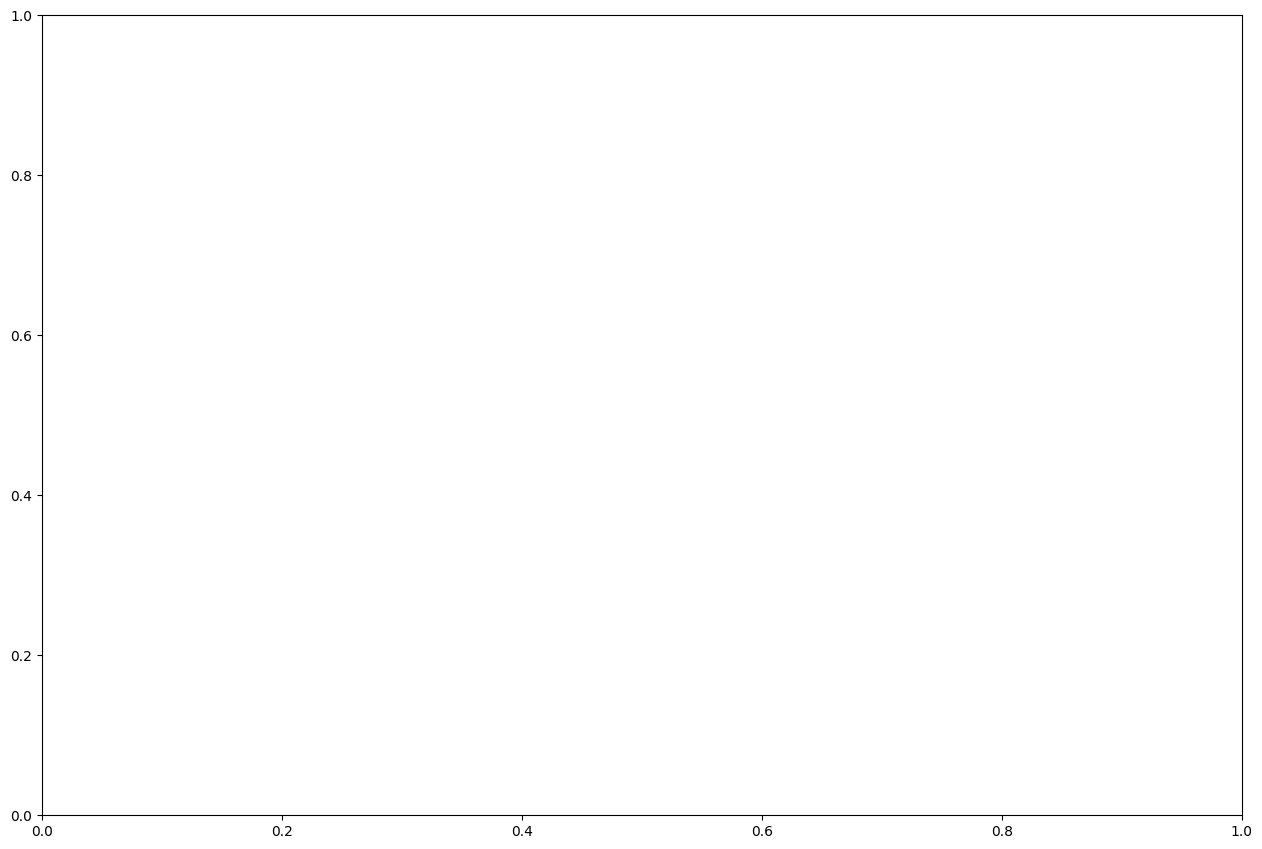

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the items for each category
shoes_items = {'Male Adult': ['Nike', 'Adidas', 'Puma', 'Browns'],
               'Female Adult': ['Nike', 'Adidas', 'Puma', 'Browns'],
               'Male Kid': ['FootLocker', 'Sketchers'],
               'Female Kid': ['FootLocker', 'Sketchers']}
clothing_items = {'Male Adult': ['Lululemon Men', 'OVO', 'Zara Men'],
                  'Female Adult': ['Lululemon Women', 'Aritzia', 'Zara Women'],
                  'Male Kid': ['OVO', 'Zara Kids'],
                  'Female Kid': ['Zara Kids', 'Aritzia']}
fragrances_items = {'Male Adult': ['Chanel', 'Dior', 'YSL', 'Gucci'],
                    'Female Adult': ['Sephora', 'Chanel', 'Dior', 'YSL', 'Gucci'],
                    'Male Kid': ['Bath and Body Works'],
                    'Female Kid': ['Bath and Body Works']}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for factors
G.add_nodes_from(['Gender', 'Age'])
G.add_nodes_from(['Male', 'Female'])
G.add_nodes_from(['Adult', 'Kid'])

# Add nodes for items and edges connecting items to corresponding factors
for gender_age, items in shoes_items.items():
    for item in items:
        G.add_node(item, Gender=gender_age.split()[0], Age=gender_age.split()[1], Category='Shoes', subset='Shoes')
        G.add_edge('Gender', item)
        G.add_edge('Age', item)

for gender_age, items in clothing_items.items():
    for item in items:
        G.add_node(item, Gender=gender_age.split()[0], Age=gender_age.split()[1], Category='Clothing', subset='Clothing')
        G.add_edge('Gender', item)
        G.add_edge('Age', item)

for gender_age, items in fragrances_items.items():
    for item in items:
        G.add_node(item, Gender=gender_age.split()[0], Age=gender_age.split()[1], Category='Fragrances', subset='Fragrances')
        G.add_edge('Gender', item)
        G.add_edge('Age', item)

# Function to select an item based on preferences
def select_item(gender, age, category):
    eligible_items = [item for item in G.nodes if G.nodes[item].get('Category') == category and G.nodes[item].get('Gender') == gender and G.nodes[item].get('Age') == age]
    if eligible_items:
        return random.choice(eligible_items)
    else:
        return "No matching items found for the given preferences."

# Function to generate random preferences
def generate_random_preferences(num_samples):
    preferences = []
    genders = ['Male', 'Female']
    ages = ['Adult', 'Kid']
    categories = ['Shoes', 'Clothing', 'Fragrances']
    for _ in range(num_samples):
        gender = random.choice(genders)
        age = random.choice(ages)
        category = random.choice(categories)
        preferences.append((gender, age, category))
    return preferences

# Example usage
num_samples = 5
random_preferences = generate_random_preferences(num_samples)
for i, (gender, age, category) in enumerate(random_preferences, 1):
    selected_item = select_item(gender, age, category)
    print(f"Sample {i}: Gender: {gender}, Age: {age}, Category: {category}, Selected Item: {selected_item}")

# Create the hierarchy tree
plt.figure(figsize=(12, 8))
# pos = nx.multipartite_layout(G, subset_key='subset')
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Hierarchy Tree")
plt.show()
